__Logistic Regression__ is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

# Logistic Regression Assumptions

 1. Binary logistic regression requires the dependent variable to be binary.
    
 2. For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
 
 3. Only the meaningful variables should be included.

 4. The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.

 5. The independent variables are linearly related to the log odds.

 6. Logistic regression requires quite large sample sizes.

Keeping the above assumptions in mind, let’s look at our dataset.

# Data

The dataset comes from the The Spotify Hit Predictor Dataset (1960-2019) of Kaggle, and it is consisting of features for tracks fetched using Spotify's Web API. The dataset starting from Jan 1st, 1970, ending at Dec 31st, 1979. The classification goal is to predict whether the track will would be a 'Hit' (1) or not (0) (variable y).

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

The dataset includes 7766 records and 19 fields.

In [2]:
data = pd.read_csv('dataset-of-70s.csv')
print(data.shape)
print(data.columns)

(7766, 19)
Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target'],
      dtype='object')


In [3]:
data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Porque?,Reginaldo Rossi,spotify:track:28KC2wl7jDv6Ms1Uc0OMpm,0.669,0.547,1,-9.873,0,0.0576,0.3530,0.000,0.0515,0.730,131.073,141067,4,28.79763,6,0
1,Free Jazz,Maria Teresa Luciani,spotify:track:0zagn8PNnM7pM8pz1gXOAD,0.291,0.300,1,-14.054,0,0.0326,0.9050,0.492,0.1180,0.039,75.619,228224,4,44.10303,9,0
2,Reject of Society,Crass,spotify:track:18eNASEiuAhO2ML5LBIoG4,0.355,0.968,7,-4.687,1,0.1890,0.0504,0.000,0.1300,0.768,181.291,66800,3,25.23004,6,0
3,Yeah !,The Jets,spotify:track:1UlJzHc8E5EprQFJxjSyPL,0.598,0.891,6,-11.904,1,0.0552,0.0183,0.836,0.5790,0.826,144.383,155395,4,55.62066,7,0
4,Gotta Find A Way,The Moments,spotify:track:1Jtlirju8tUXTtvyZJAN5v,0.440,0.376,5,-10.939,1,0.0482,0.3480,0.000,0.0815,0.358,130.438,218333,4,34.90979,12,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7766 entries, 0 to 7765
Data columns (total 19 columns):
track               7766 non-null object
artist              7766 non-null object
uri                 7766 non-null object
danceability        7766 non-null float64
energy              7766 non-null float64
key                 7766 non-null int64
loudness            7766 non-null float64
mode                7766 non-null int64
speechiness         7766 non-null float64
acousticness        7766 non-null float64
instrumentalness    7766 non-null float64
liveness            7766 non-null float64
valence             7766 non-null float64
tempo               7766 non-null float64
duration_ms         7766 non-null int64
time_signature      7766 non-null int64
chorus_hit          7766 non-null float64
sections            7766 non-null int64
target              7766 non-null int64
dtypes: float64(10), int64(6), object(3)
memory usage: 1.1+ MB


### Input variables

 1. track: The Name of the track — (categorial)
 2. artist: The Name of the first artist listed for the track — (categorial)
 3. uri: The resource identifier for the track — (categorial)
 4. danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements —(numeric).
 5. energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks — (numeric).
 6. key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C?/D?, 2 = D, — (numeric).
 7. loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful — (numeric).
 8. mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is — (numeric).
 9. speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book — (numeric).
 10. acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is — (numeric).
 11. instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. — (numeric).
 12. liveness: Detects the presence of an audience in the recording — (numeric). 
 13. valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. — (numeric). 
 14. tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed — (numeric). 
 15. duration_ms: The duration of the track in milliseconds — (numeric). 
 16. time_signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats —(numeric).
 17. chorus_hit: This the the author's best estimate of when the chorus would start for the track. Its the timestamp of the start of the third —(numeric).
 18. sections: The number of sections the particular track has. This feature was extracted from the data recieved by the API call — (numeric)
 

### Predict variable (desired target):

target — whether the track is a hit or not? (binary: “1”, means “Yes”, “0” means “No”)

In [5]:
data['track'].unique()
print(len(data['track'].unique()))

7396


In [6]:
print(data['artist'].unique())
print(len(data['artist'].unique()))

['Reginaldo Rossi' 'Maria Teresa Luciani' 'Crass' ... 'Karen Young'
 'Petra' 'Manu Dibango']
1837


In [7]:
print(data['uri'].unique())
print(len(data['uri'].unique()))

['spotify:track:28KC2wl7jDv6Ms1Uc0OMpm'
 'spotify:track:0zagn8PNnM7pM8pz1gXOAD'
 'spotify:track:18eNASEiuAhO2ML5LBIoG4' ...
 'spotify:track:6zm0XoxnzzdFeXeYGE8gFh'
 'spotify:track:6fsAxEHvbVPU8pVPnBXaX2'
 'spotify:track:75y3G2V8wSpm89einsZ4d5']
7749


# Data exploration

In [8]:
data['target'].value_counts()

1    3883
0    3883
Name: target, dtype: int64

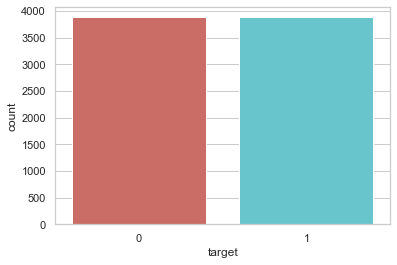

<Figure size 432x288 with 0 Axes>

In [9]:
sns.countplot(x='target', data=data, palette= 'hls')
plt.show()
plt.savefig('count_plot')

In [10]:
count_no_hit = len(data[data['target']==0])
count_hit = len(data[data['target']==1])
pct_of_no_hit = count_no_hit/(count_no_hit+count_hit)
print("\033[1m percentage of no hit is", pct_of_no_hit*100)
pct_of_hit = count_hit/(count_no_hit+count_hit)
print("\033[1m percentage of hit", pct_of_hit*100)

 percentage of no hit is 50.0
 percentage of hit 50.0


Our classes are imbalanced, and the ratio of no-hit to hit instances is 50:50. Let’s do some more exploration.

In [11]:
data.groupby('target').mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections
target,,,,,,,,,,,,,,,
0,0.480631,0.471024,5.281998,-13.012062,0.680144,0.070965,0.527433,0.275982,0.206295,0.527134,118.314512,245948.17435,3.827711,40.317710,11.048931
1,0.570370,0.584880,5.134690,-10.456478,0.763842,0.053141,0.341048,0.048343,0.193293,0.664852,119.704382,233918.05846,3.940252,39.377945,10.473088


# Observations:
 1. The average danceability level of hits is higher than that of non-hits.
 2. The average energy level of hits is higher than that of non-hits.
 3. The average key level of hits is a bit lower than that of non-hits.
 4. The average loudness level of hits is lower than that of non-hits.
 5. The average mode level of hits is higher than that of non-hits.
 6. The average speechiness level of hits is a bit lower than that of non-hits.
 7. The average acousticness level of hits is a bit lower than that of non-hits.
 8. The average instrumentalness level of hits is lower than that of non-hits.
 9. The average liveness level of hits is a bit lower than that of non-hits.
 10. The average valence level of hits is higher than that of non-hits.
 11. The average tempo level of hits is higher than that of non-hits.
 12. The average duration_ms level of hits is lower than that of non-hits.
 13. The average time_signature level of hits is higher than that of non-hits.
 14. The average chorus_hit level of hits is a bit lower than that of non-hits.
 15. The average sections level of hits is a bit lower than that of non-hits.


# Visualizations

## 1. danceability

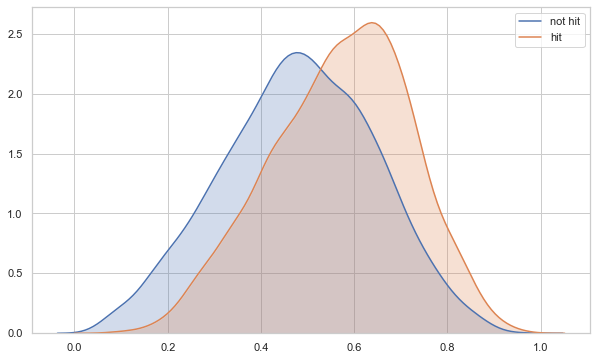

In [12]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import matplotlib.pyplot as plt
import seaborn as sns
sns.kdeplot(data['danceability'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['danceability'].loc[data['target'] == 1], label='hit', shade=True);

In [13]:
data['danceability'].loc[data['target'] == 0].describe()

count    3883.000000
mean        0.480631
std         0.163612
min         0.063000
25%         0.368000
50%         0.484000
75%         0.598500
max         0.948000
Name: danceability, dtype: float64

In [14]:
data['danceability'].loc[data['target'] == 1].describe()

count    3883.000000
mean        0.570370
std         0.149094
min         0.090800
25%         0.467000
50%         0.582000
75%         0.678000
max         0.961000
Name: danceability, dtype: float64

## 2. energy

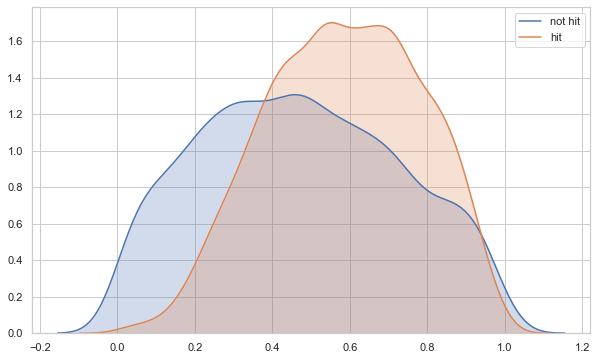

In [15]:
sns.kdeplot(data['energy'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['energy'].loc[data['target'] == 1], label='hit', shade=True);

In [16]:
data['energy'].loc[data['target'] == 0].describe()

count    3883.000000
mean        0.471024
std         0.255911
min         0.001100
25%         0.267000
50%         0.460000
75%         0.669000
max         0.999000
Name: energy, dtype: float64

In [17]:
data['energy'].loc[data['target'] == 1].describe()

count    3883.000000
mean        0.584880
std         0.197369
min         0.022000
25%         0.437000
50%         0.589000
75%         0.737000
max         0.995000
Name: energy, dtype: float64

## 3. key

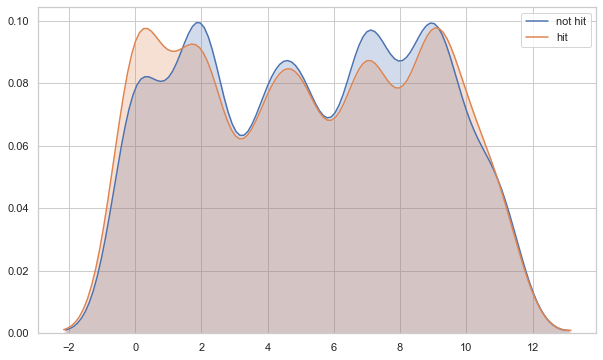

In [18]:
sns.kdeplot(data['key'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['key'].loc[data['target'] == 1], label='hit', shade=True);

In [19]:
data['key'].loc[data['target'] == 0].describe()

count    3883.000000
mean        5.281998
std         3.454951
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        11.000000
Name: key, dtype: float64

In [20]:
data['key'].loc[data['target'] == 1].describe()

count    3883.000000
mean        5.134690
std         3.552236
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        11.000000
Name: key, dtype: float64

## 4. loudness

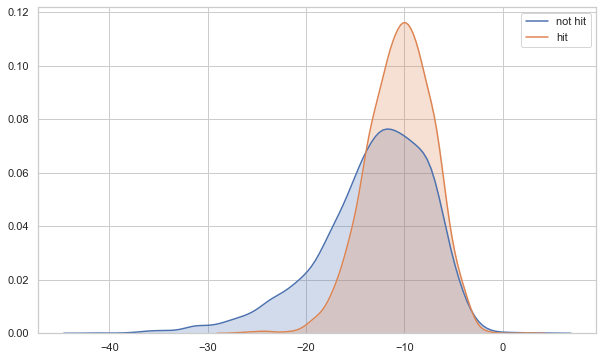

In [21]:
sns.kdeplot(data['loudness'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['loudness'].loc[data['target'] == 1], label='hit', shade=True);

In [22]:
data['loudness'].loc[data['target'] == 0].describe()

count    3883.000000
mean      -13.012062
std         5.653054
min       -41.440000
25%       -16.036000
50%       -12.244000
75%        -8.920000
max         3.744000
Name: loudness, dtype: float64

In [23]:
data['loudness'].loc[data['target'] == 1].describe()

count    3883.000000
mean      -10.456478
std         3.342201
min       -27.010000
25%       -12.654000
50%       -10.280000
75%        -8.084000
max         2.291000
Name: loudness, dtype: float64

## 5. mode

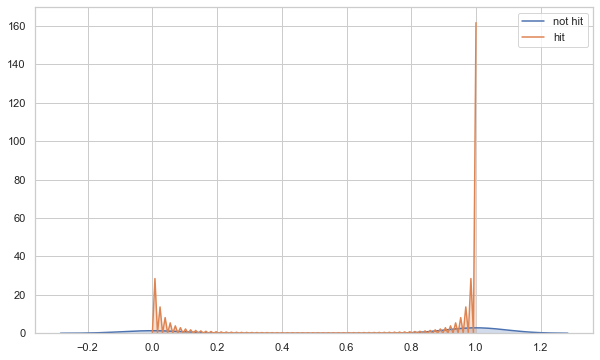

In [24]:
sns.kdeplot(data['mode'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['mode'].loc[data['target'] == 1], label='hit', shade=True);

In [25]:
data['mode'].loc[data['target'] == 0].describe()

count    3883.000000
mean        0.680144
std         0.466481
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: mode, dtype: float64

In [26]:
data['mode'].loc[data['target'] == 1].describe()

count    3883.000000
mean        0.763842
std         0.424775
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: mode, dtype: float64

## 6. speechiness

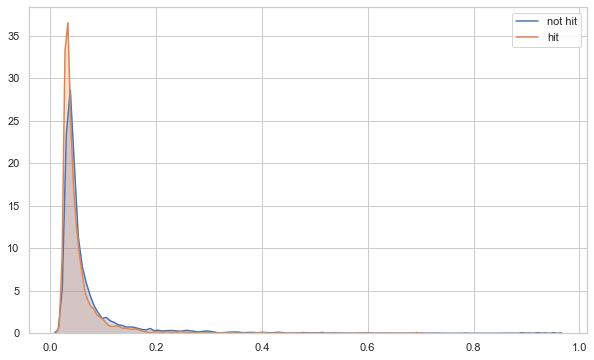

In [27]:
sns.kdeplot(data['speechiness'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['speechiness'].loc[data['target'] == 1], label='hit', shade=True);

In [28]:
data['speechiness'].loc[data['target'] == 0].describe()

count    3883.000000
mean        0.070965
std         0.085179
min         0.022500
25%         0.035600
50%         0.044400
75%         0.067200
max         0.952000
Name: speechiness, dtype: float64

In [29]:
data['speechiness'].loc[data['target'] == 1].describe()

count    3883.000000
mean        0.053141
std         0.048387
min         0.022700
25%         0.031500
50%         0.038500
75%         0.054900
max         0.693000
Name: speechiness, dtype: float64

## 7. acousticness

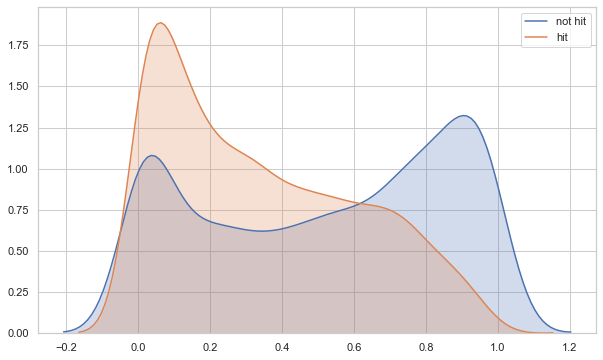

In [30]:
sns.kdeplot(data['acousticness'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['acousticness'].loc[data['target'] == 1], label='hit', shade=True);

In [31]:
data['acousticness'].loc[data['target'] == 0].describe()

count    3883.000000
mean        0.527433
std         0.340562
min         0.000001
25%         0.203000
50%         0.580000
75%         0.843000
max         0.996000
Name: acousticness, dtype: float64

In [32]:
data['acousticness'].loc[data['target'] == 1].describe()

count    3883.000000
mean        0.341048
std         0.270915
min         0.000008
25%         0.097050
50%         0.288000
75%         0.556500
max         0.988000
Name: acousticness, dtype: float64

## 8. instrumentalness

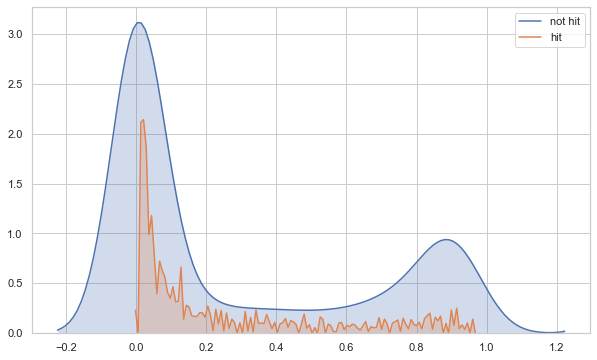

In [33]:
sns.kdeplot(data['instrumentalness'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['instrumentalness'].loc[data['target'] == 1], label='hit', shade=True);

In [34]:
data['instrumentalness'].loc[data['target'] == 0].describe()

count    3883.000000
mean        0.275982
std         0.369321
min         0.000000
25%         0.000027
50%         0.012000
75%         0.672000
max         0.998000
Name: instrumentalness, dtype: float64

In [35]:
data['instrumentalness'].loc[data['target'] == 1].describe()

count    3883.000000
mean        0.048343
std         0.158205
min         0.000000
25%         0.000002
50%         0.000083
75%         0.004220
max         0.966000
Name: instrumentalness, dtype: float64

## 9. liveness

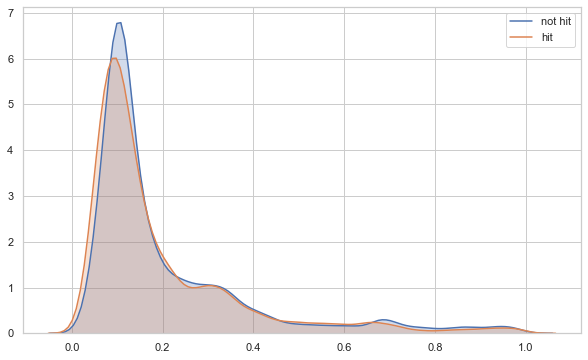

In [36]:
sns.kdeplot(data['liveness'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['liveness'].loc[data['target'] == 1], label='hit', shade=True);

In [37]:
data['liveness'].loc[data['target'] == 0].describe()

count    3883.000000
mean        0.206295
std         0.185364
min         0.019700
25%         0.097400
50%         0.128000
75%         0.250000
max         0.990000
Name: liveness, dtype: float64

In [38]:
data['liveness'].loc[data['target'] == 1].describe()

count    3883.000000
mean        0.193293
std         0.175339
min         0.014600
25%         0.086200
50%         0.126000
75%         0.233500
max         0.999000
Name: liveness, dtype: float64

## 10. valence

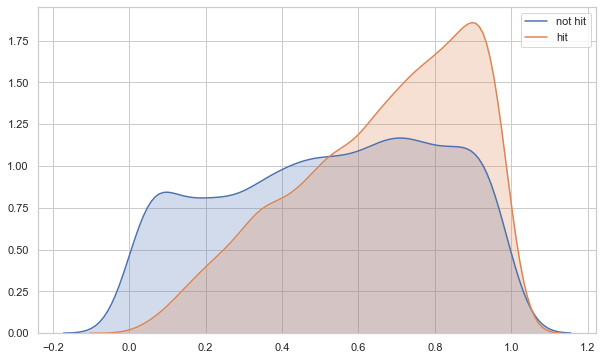

In [39]:
sns.kdeplot(data['valence'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['valence'].loc[data['target'] == 1], label='hit', shade=True);

In [40]:
data['valence'].loc[data['target'] == 0].describe()

count    3883.000000
mean        0.527134
std         0.282613
min         0.000000
25%         0.298000
50%         0.550000
75%         0.766000
max         0.984000
Name: valence, dtype: float64

In [41]:
data['valence'].loc[data['target'] == 1].describe()

count    3883.000000
mean        0.664852
std         0.228909
min         0.036400
25%         0.503000
50%         0.708000
75%         0.860000
max         0.990000
Name: valence, dtype: float64

## 11. tempo

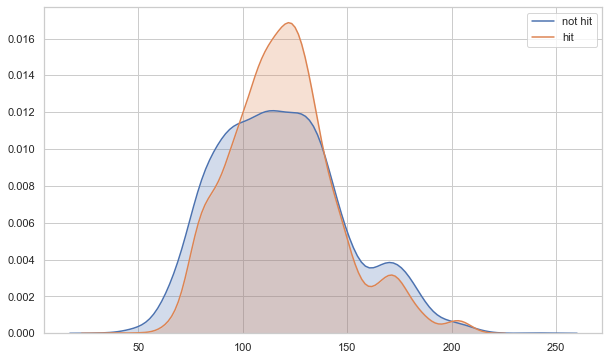

In [42]:
sns.kdeplot(data['tempo'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['tempo'].loc[data['target'] == 1], label='hit', shade=True);

In [43]:
data['tempo'].loc[data['target'] == 0].describe()

count    3883.000000
mean      118.314512
std        30.515561
min        35.732000
25%        95.051000
50%       116.111000
75%       136.953500
max       241.423000
Name: tempo, dtype: float64

In [44]:
data['tempo'].loc[data['target'] == 1].describe()

count    3883.000000
mean      119.704382
std        26.058584
min        37.114000
25%       101.863500
50%       118.368000
75%       133.653000
max       211.261000
Name: tempo, dtype: float64

## 12. duration_ms

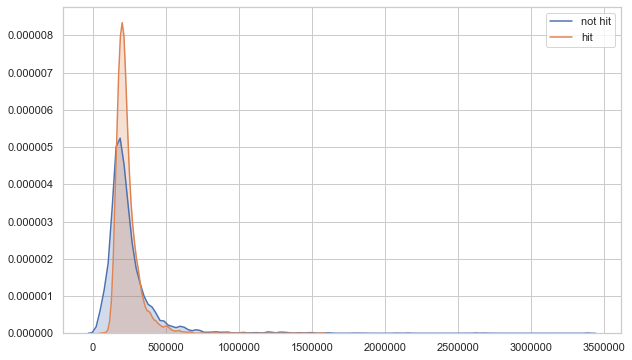

In [45]:
sns.kdeplot(data['duration_ms'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['duration_ms'].loc[data['target'] == 1], label='hit', shade=True);

In [46]:
data['duration_ms'].loc[data['target'] == 0].describe()

count    3.883000e+03
mean     2.459482e+05
std      1.869300e+05
min      2.049300e+04
25%      1.578855e+05
50%      2.043870e+05
75%      2.755735e+05
max      3.391040e+06
Name: duration_ms, dtype: float64

In [47]:
data['duration_ms'].loc[data['target'] == 1].describe()

count    3.883000e+03
mean     2.339181e+05
std      8.381472e+04
min      7.476600e+04
25%      1.845000e+05
50%      2.141460e+05
75%      2.585120e+05
max      1.561133e+06
Name: duration_ms, dtype: float64

## 13. time_signature

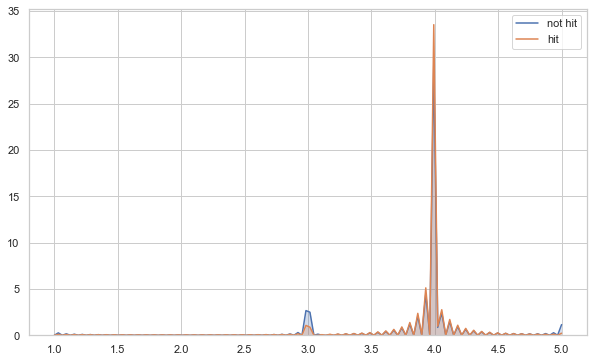

In [48]:
sns.kdeplot(data['time_signature'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['time_signature'].loc[data['target'] == 1], label='hit', shade=True);

In [49]:
data['time_signature'].loc[data['target'] == 0].describe()

count    3883.000000
mean        3.827711
std         0.535629
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: time_signature, dtype: float64

In [50]:
data['time_signature'].loc[data['target'] == 1].describe()

count    3883.000000
mean        3.940252
std         0.282651
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: time_signature, dtype: float64

## 14. chorus_hit

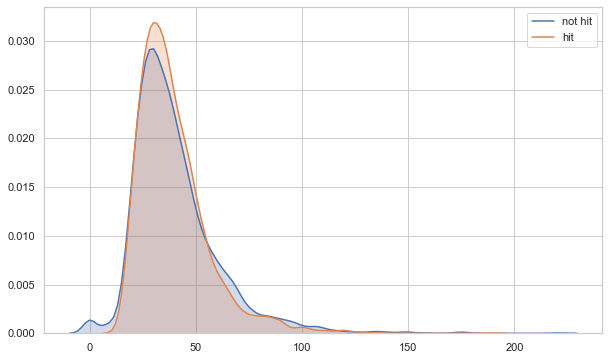

In [51]:
sns.kdeplot(data['chorus_hit'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['chorus_hit'].loc[data['target'] == 1], label='hit', shade=True);

In [52]:
data['chorus_hit'].loc[data['target'] == 0].describe()

count    3883.000000
mean       40.317710
std        19.914541
min         0.000000
25%        27.397965
50%        36.028240
75%        48.233750
max       220.024500
Name: chorus_hit, dtype: float64

In [53]:
data['chorus_hit'].loc[data['target'] == 1].describe()

count    3883.000000
mean       39.377945
std        16.490315
min        14.420000
25%        28.010415
50%        35.843150
75%        46.513015
max       188.306050
Name: chorus_hit, dtype: float64

## 15. sections

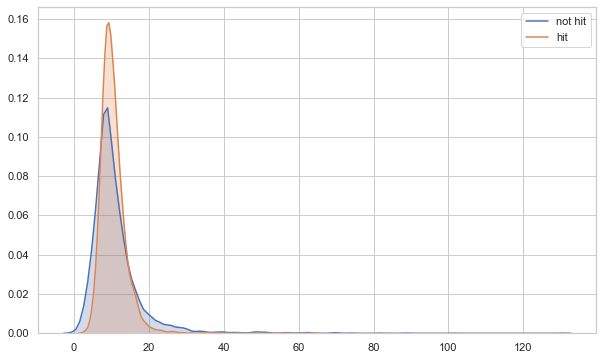

In [54]:
sns.kdeplot(data['sections'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['sections'].loc[data['target'] == 1], label='hit', shade=True);

In [55]:
data['sections'].loc[data['target'] == 0].describe()

count    3883.000000
mean       11.048931
std         7.211544
min         0.000000
25%         7.000000
50%        10.000000
75%        13.000000
max       130.000000
Name: sections, dtype: float64

In [56]:
data['sections'].loc[data['target'] == 1].describe()

count    3883.000000
mean       10.473088
std         3.391656
min         3.000000
25%         8.000000
50%        10.000000
75%        12.000000
max        64.000000
Name: sections, dtype: float64

Our final data columns will be:

In [57]:
data_final=data.copy()
data_final.columns.values

array(['track', 'artist', 'uri', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'chorus_hit', 'sections', 'target'], dtype=object)

In [58]:
data_final.drop(['track', 'artist', 'uri'], axis=1, inplace=True)

In [59]:
data_final.columns.values

array(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections',
       'target'], dtype=object)

In [60]:
X = data_final.loc[:, data_final.columns != 'target']
y = data_final.loc[:, data_final.columns == 'target']
y=y.astype('int')

# Implementing the model

In [61]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.545800
         Iterations 6
                         Results: Logit
Model:               Logit            Pseudo R-squared: 0.213    
Dependent Variable:  target           AIC:              8507.3674
Date:                2020-06-03 00:12 BIC:              8611.7300
No. Observations:    7766             Log-Likelihood:   -4238.7  
Df Model:            14               LL-Null:          -5383.0  
Df Residuals:        7751             LLR p-value:      0.0000   
Converged:           1.0000           Scale:            1.0000   
No. Iterations:      6.0000                                      
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
danceability      2.7124   0.2227  12.1814 0.0000  2.2760  3.1489
energy           -0.1342   0.2100  -0.6390 0.5228 -0.5458  0.2774


# Logistic Regression Model Fitting

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting the test set results and calculating the accuracy

In [63]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.50


### Confusion Matrix

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1157    0]
 [1173    0]]


In [65]:
print("\033[1m The result is telling us that we have: ",
      (confusion_matrix[0,0]+confusion_matrix[1,1]),
      "correct predictions.")
print("\033[1m The result is telling us that we have: ",
      (confusion_matrix[0,1]+confusion_matrix[1,0]),
      "incorrect predictions.")
print("\033[1m We have a total predictions of: ",
      (confusion_matrix.sum()))

 The result is telling us that we have:  1157 correct predictions.
 The result is telling us that we have:  1173 incorrect predictions.
 We have a total predictions of:  2330


### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.66      1157
           1       0.00      0.00      0.00      1173

    accuracy                           0.50      2330
   macro avg       0.25      0.50      0.33      2330
weighted avg       0.25      0.50      0.33      2330



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
 #calculate Accuracy, how often is the classifier correct?
print("Accuracy of Logistic Regression model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
print("Well, you got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
#calculate Precision
print("\nPrecision of Logistic Regression model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred)))
print("Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can\nsay, when a model makes a prediction, how often it is correct. In our prediction case, when our Logistic\nRegression model predicted a track is a hit, that track was actually a hit","{:.2%}".format(metrics.precision_score(y_test, y_pred)),"of\n the time.")
#calculate Recall
print("\nRecall of Logistic Regression model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred)))
print("Recall: If there is a track which is a hit the present in the test set, our Logistic Regression model\ncan identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred)) ,"of the time.")

Accuracy of Logistic Regression model: 49.66%
Well, you got a classification rate of 49.66%

Precision of Logistic Regression model: 0.00%
Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can
say, when a model makes a prediction, how often it is correct. In our prediction case, when our Logistic
Regression model predicted a track is a hit, that track was actually a hit 0.00% of
 the time.

Recall of Logistic Regression model: 0.00%
Recall: If there is a track which is a hit the present in the test set, our Logistic Regression model
can identify it 0.00% of the time.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### ROC Curve

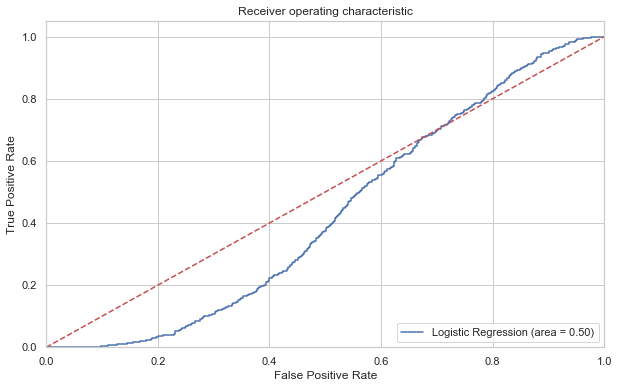

In [68]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

# Random forest Classifier Model Fitting

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Predicting the test set results and calculating the accuracy

In [70]:
y_pred = rf.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.77


### Confusion Matrix

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[863 294]
 [231 942]]


In [72]:
print("\033[1m The result is telling us that we have: ",
      (confusion_matrix[0,0]+confusion_matrix[1,1]),
      "correct predictions.")
print("\033[1m The result is telling us that we have: ",
      (confusion_matrix[0,1]+confusion_matrix[1,0]),
      "incorrect predictions.")
print("\033[1m We have a total predictions of: ",
      (confusion_matrix.sum()))

 The result is telling us that we have:  1805 correct predictions.
 The result is telling us that we have:  525 incorrect predictions.
 We have a total predictions of:  2330


### Compute precision, recall, F-measure and support

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1157
           1       0.76      0.80      0.78      1173

    accuracy                           0.77      2330
   macro avg       0.78      0.77      0.77      2330
weighted avg       0.78      0.77      0.77      2330



In [74]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
 #calculate Accuracy, how often is the classifier correct?
print("Accuracy of Random Forest model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
print("Well, you got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
#calculate Precision
print("\nPrecision of Random Forest model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred)))
print("Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can\nsay, when a model makes a prediction, how often it is correct. In our prediction case, when our Random\nForest model predicted a track is a hit, that track was actually a hit","{:.2%}".format(metrics.precision_score(y_test, y_pred)),"of\n the time.")
#calculate Recall
print("\nRecall of Random Forest model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred)))
print("Recall: If there is a track which is a hit the present in the test set, our Random Forest model\ncan identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred)) ,"of the time.")

Accuracy of Random Forest model: 77.47%
Well, you got a classification rate of 77.47%

Precision of Random Forest model: 76.21%
Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can
say, when a model makes a prediction, how often it is correct. In our prediction case, when our Random
Forest model predicted a track is a hit, that track was actually a hit 76.21% of
 the time.

Recall of Random Forest model: 80.31%
Recall: If there is a track which is a hit the present in the test set, our Random Forest model
can identify it 80.31% of the time.


### ROC Curve

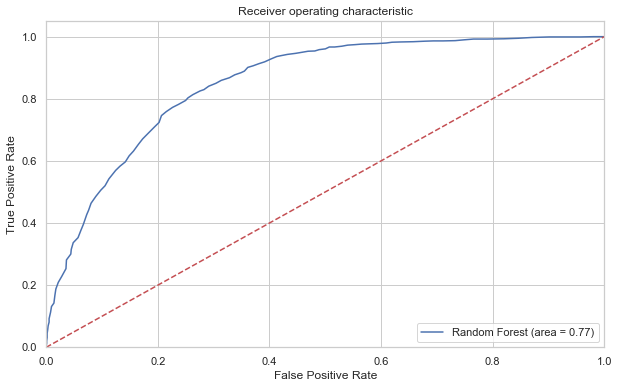

In [75]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Gradient boosting Classifier Model Fitting

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### Predicting the test set results and calculating the accuracy

In [77]:
y_pred = gb.predict(X_test)
print('Accuracy of gradient boosting classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy of gradient boosting classifier on test set: 0.77


### Confusion Matrix

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[831 326]
 [210 963]]


In [79]:
print("\033[1m The result is telling us that we have: ",
      (confusion_matrix[0,0]+confusion_matrix[1,1]),
      "correct predictions.")
print("\033[1m The result is telling us that we have: ",
      (confusion_matrix[0,1]+confusion_matrix[1,0]),
      "incorrect predictions.")
print("\033[1m We have a total predictions of: ",
      (confusion_matrix.sum()))

 The result is telling us that we have:  1794 correct predictions.
 The result is telling us that we have:  536 incorrect predictions.
 We have a total predictions of:  2330


### Compute precision, recall, F-measure and support

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1157
           1       0.75      0.82      0.78      1173

    accuracy                           0.77      2330
   macro avg       0.77      0.77      0.77      2330
weighted avg       0.77      0.77      0.77      2330



In [81]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
 #calculate Accuracy, how often is the classifier correct?
print("Accuracy of Gradient Boosting model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
print("Well, you got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
#calculate Precision
print("\nPrecision of Gradient Boosting model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred)))
print("Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can\nsay, when a model makes a prediction, how often it is correct. In our prediction case, when our Gradient\nBoosting model predicted a track is a hit, that track was actually a hit","{:.2%}".format(metrics.precision_score(y_test, y_pred)),"of\n the time.")
#calculate Recall
print("\nRecall of Gradient Boosting model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred)))
print("Recall: If there is a track which is a hit the present in the test set, our Gradient Boosting model\ncan identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred)) ,"of the time.")

Accuracy of Gradient Boosting model: 77.00%
Well, you got a classification rate of 77.00%

Precision of Gradient Boosting model: 74.71%
Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can
say, when a model makes a prediction, how often it is correct. In our prediction case, when our Gradient
Boosting model predicted a track is a hit, that track was actually a hit 74.71% of
 the time.

Recall of Gradient Boosting model: 82.10%
Recall: If there is a track which is a hit the present in the test set, our Gradient Boosting model
can identify it 82.10% of the time.


### ROC Curve

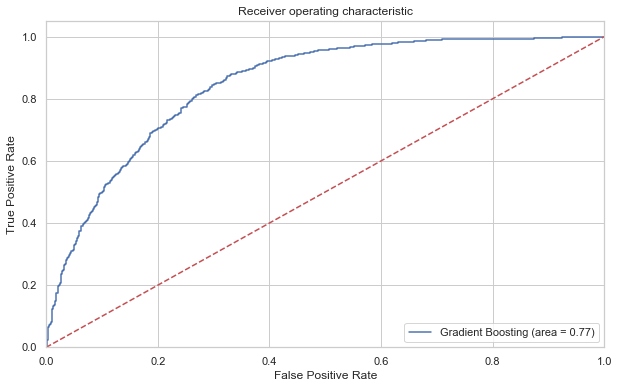

In [82]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
gb_roc_auc = roc_auc_score(y_test, gb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % gb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

I would consider the random forest as our final model

# Real time predictions

Finally, the best way to use this model is assigning hit Probability for each track, create segments, and build strategies on top of that. To get the churn probability from our model, utilize the code block below:

In [86]:
data['Prob_to_Hit'] = rf.predict_proba(data[X_train.columns])[:,1]

Our dataset looks like below at the end:

In [87]:
data[['track','artist','Prob_to_Hit']].head(10)

,track,artist,Prob_to_Hit
0,Porque?,Reginaldo Rossi,0.21
1,Free Jazz,Maria Teresa Luciani,0.14
2,Reject of Society,Crass,0.03
3,Yeah !,The Jets,0.09
4,Gotta Find A Way,The Moments,0.87
5,What Shall We Do When We All Go Out?,Mike Seeger,0.03
6,Beautiful Sunday,Daniel Boone,0.83
7,The Man With The Child In His Eyes,Kate Bush,0.77
8,Psychedelic Shack,The Temptations,0.85
9,Tell It Like It Is,Andy Williams,0.65


In [88]:
data.to_csv('Prob_to_Hit_70s.csv', index=False, encoding='utf-8')

# Your Turn!

Hopefully, this post gives you a good idea of what a machine learning classification project looks like. As you can see, much of the work is in the data wrangling and the preparation steps, and these procedures consume most of the time spent on machine learning.

Now it’s time to get out there and start exploring and cleaning your data. Try two or three algorithms, and let me know how it goes.

I would be pleased to receive feedback or questions on any of the above.